In [1]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# K-means Clustering
from sklearn.cluster import KMeans

# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Performance Evaluation
from sklearn.metrics import silhouette_samples 
from sklearn.metrics import silhouette_score


In [2]:

abalone = pd.read_csv(join('data', 'abalone.csv')) # 데이터 불러오기
print(abalone.shape)
abalone.head(10)


(4176, 9)


,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14


In [102]:
# Data Processing
datay = data[:,0] # 성별을 Y 레이블로함
del abalone['M'] # 카테고리컬 데이터인 M 은 input에서 삭제

data = np.array(abalone) # numpy array 로 변환
nvar = data.shape[1] #컬럼데이터개수
datax = data[:, 0:nvar] # input 데이터 저장
print(datax[0:5,:]) 
datax_scale = datax #오리지널 데이터는 datax는 남기기위해 datax_scale에 복사
for i in range(nvar):
    datax_scale[:,i] = (data[:,i]-np.mean(datax[:,i]))/np.std(datax[:,i])

[[ 0.35    0.265   0.09    0.2255  0.0995  0.0485  0.07    7.    ]
 [ 0.53    0.42    0.135   0.677   0.2565  0.1415  0.21    9.    ]
 [ 0.44    0.365   0.125   0.516   0.2155  0.114   0.155  10.    ]
 [ 0.33    0.255   0.08    0.205   0.0895  0.0395  0.055   7.    ]
 [ 0.425   0.3     0.095   0.3515  0.141   0.0775  0.12    8.    ]]
[[-1.44900723 -1.43989229 -1.18425209 ... -1.20532696 -1.21305408
  -0.90979684]
 [ 0.0498915   0.12201495 -0.10824748 ... -0.35684354 -0.20727719
  -0.28929846]
 [-0.69955786 -0.4322102  -0.34735962 ... -0.60773918 -0.60240383
   0.02095074]
 ...
 [ 0.63279657  0.67624011  1.56553747 ...  0.97518418  0.49676663
  -0.28929846]
 [ 0.84097695  0.77700832  0.25042072 ...  0.73341202  0.41055718
   0.02095074]
 [ 1.54879024  1.48238578  1.32642533 ...  1.78717368  1.84019719
   0.64144912]]


In [90]:
# 출력 여러개 한번에 볼 수 있게 하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# K-means Clustering (k = 3, 5 ,7)
kmeans_3 = KMeans(n_clusters=3 , init='random', random_state=122)
kmeans_5 = KMeans(n_clusters=5 , init='random', random_state=122)
kmeans_7 = KMeans(n_clusters=7 , init='random', random_state=122)
kmeans_3.fit(datax_scale)
kmeans_5.fit(datax_scale)
kmeans_7.fit(datax_scale)

#center vecotr
kmeans_3.cluster_centers_
kmeans_5.cluster_centers_
kmeans_7.cluster_centers_

#cluster label
kmeans_3.labels_
kmeans_5.labels_
kmeans_7.labels_

# 성능
silhouette_score(datax_scale, kmeans_3.labels_)
silhouette_score(datax_scale, kmeans_5.labels_)
silhouette_score(datax_scale, kmeans_7.labels_)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=122,
       tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=122,
       tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=7,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=122,
       tol=0.0001, verbose=0)

array([[-1.29297926, -1.29432378, -1.12673371, -1.14653153, -1.0970798 ,
        -1.12535544, -1.13237159],
       [ 0.120216  ,  0.11863501,  0.06221677, -0.10113716, -0.11185446,
        -0.10189966, -0.06898389],
       [ 1.03237663,  1.03584509,  0.95936053,  1.20707339,  1.17617947,
         1.18847186,  1.14878148]])

array([[ 0.82915903,  0.83746924,  0.72659201,  0.81751985,  0.79138425,
         0.80633533,  0.78820609],
       [-0.50985069, -0.51713776, -0.49244284, -0.70852861, -0.68243391,
        -0.69523431, -0.68249164],
       [ 1.39105559,  1.38428273,  1.39147347,  1.93084247,  1.88307374,
         1.89180641,  1.82887813],
       [ 0.25313584,  0.25579501,  0.17306091,  0.03422723,  0.01623896,
         0.0260783 ,  0.06793314],
       [-1.70780402, -1.70936746, -1.4482492 , -1.34283934, -1.28541435,
        -1.30965523, -1.33428476]])

array([[ 0.71401447,  0.72122808,  0.60707474,  0.63551773,  0.62508062,
         0.63603454,  0.60841011],
       [-1.11687421, -1.12511553, -1.00001815, -1.11117567, -1.0651072 ,
        -1.09626401, -1.09391545],
       [-2.15128662, -2.13873258, -1.78051907, -1.48515321, -1.41962247,
        -1.44133919, -1.48898343],
       [ 1.59880431,  1.57916013,  1.69675754,  2.40268379,  2.42593883,
         2.30462506,  2.23911302],
       [ 1.12471314,  1.12775172,  1.04623022,  1.35270029,  1.27141185,
         1.3273099 ,  1.31788527],
       [ 0.24234372,  0.24814168,  0.15891029,  0.01591502, -0.00255047,
         0.00427234,  0.05305224],
       [-0.35838312, -0.36869827, -0.35745482, -0.59128998, -0.57328755,
        -0.57146537, -0.56192057]])

array([0, 1, 1, ..., 2, 2, 2])

array([4, 3, 1, ..., 0, 0, 2])

array([1, 5, 6, ..., 0, 0, 3])

0.44263668489521835

0.38685967400265325

0.33872688383381916

0.3757197340862749

0.3230323633816389

0.3054453612288014

<Figure size 720x720 with 0 Axes>

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [130.0, 130.0, 160.0, 160.0],
  [91.25, 91.25, 145.0, 145.0],
  [41.25, 41.25, 118.125, 118.125],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [192.5, 192.5, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [250.0, 250.0, 282.5, 282.5],
  [206.25, 206.25, 266.25, 266.25],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [365.0, 365.0, 375.0, 375.0],
  [385.0, 385.0, 395.0, 395.0],
  [370.0, 370.

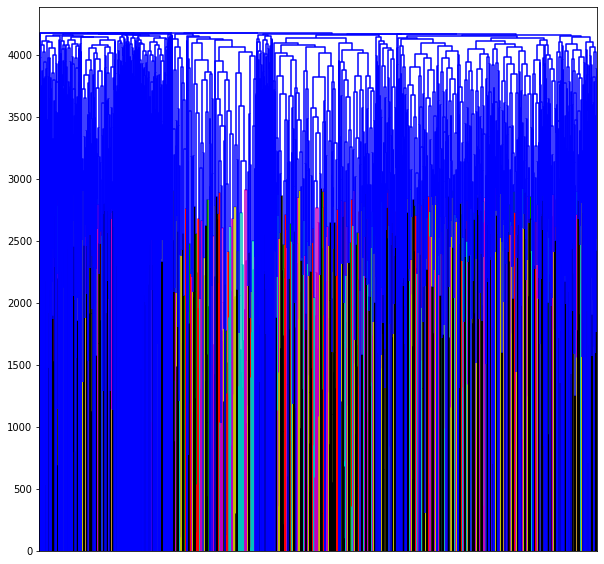

In [104]:
#datax = data[:, 0:nvar-1]
# Hierarchical Clustering
complete_clustering_3 = AgglomerativeClustering(linkage='complete', n_clusters=3).fit(datax)
complete_clustering_5 = AgglomerativeClustering(linkage='complete', n_clusters=5).fit(datax)
complete_clustering_7 = AgglomerativeClustering(linkage='complete', n_clusters=7).fit(datax)
# 성능
silhouette_score(datax_scale, complete_clustering_3.labels_)
silhouette_score(datax_scale, complete_clustering_5.labels_)
silhouette_score(datax_scale, complete_clustering_7.labels_)
# Visualization
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식노드
children_3 = complete_clustering_3.children_
# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance_3 = np.arange(children_3.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations_3 = np.arange(2, children_3.shape[0]+2)

# 덴드로그램을 그리기 위한 연결 매트릭스를 생성한다.
linkage_matrix_3 = np.column_stack([children_3, distance_3, no_of_observations_3]).astype(float)

dendrogram(linkage_matrix_3, p = datax_scale.shape[0], labels = complete_clustering_3.labels_,
          show_contracted=True, no_labels = True)
plt.show()